1.  Объясните методы и алгоритмы, используемые для трехмерной реконструкции 
по  множеству  двумерных  изображений.  Какие  технологии  и  подходы 
применяются для выбора модели преобразования изображений при создании 
трехмерных моделей из двухмерных данных? Расскажите, как функции качества 
и робастная оценка, такая как RANSAC, используются для повышения точности 
и надёжности трехмерной реконструкции. 
2.  Напишите  функцию  на  Python  для  обнаружения  углов  на  изображении  с 
использованием алгоритма Харриса.

**Методы 3D-реконструкции:**  
- **Structure from Motion (SfM):** Восстанавливает 3D-структуру через сопоставление ключевых точек (SIFT, SURF) на 2D-изображениях, оптимизирует позиции камер и точек с помощью bundle adjustment.  
- **Multi-View Stereo (MVS):** Уточняет 3D-модель SfM, используя плотное сопоставление пикселей.  
- **Стереозрение:** Восстанавливает глубину по паре изображений с известным базовым расстоянием (алгоритмы: блок-матчинг, semi-global matching).  

**Модели преобразования:**  
- **Гомография** — для плоских сцен.  
- **Фундаментальная/essential матрицы** — для произвольной геометрии.  
- **Калибровка камеры** — учёт внутренних параметров (фокусное расстояние, дисторсия).  

**Функции качества и RANSAC:**  
- **Функции качества (SSD, NCC):** Оценивают точность сопоставления пикселей/точек.  
- **RANSAC:** Итеративно отбирает inliers, исключая outliers, для робастной оценки параметров (напр., фундаментальной матрицы). Уменьшает влияние шума и выбросов, повышая надёжность реконструкции.  

**Итог:** SfM и MVS — ключевые методы; RANSAC и функции качества критичны для точности, особенно при наличии шума.

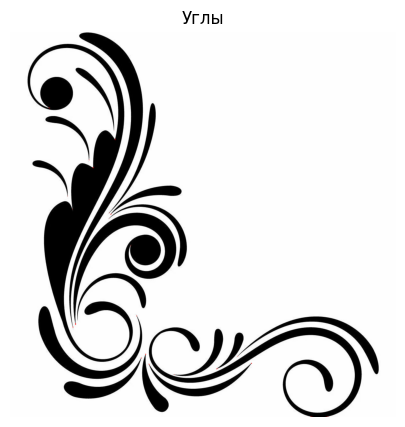

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./data/harris.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

image[dst > 0.01 * dst.max()] = [0, 0, 255]

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(image_rgb)
plt.title('Углы')
plt.axis('off')
plt.show()